In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("data/glass.csv")
df.shape

(214, 10)

In [6]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [7]:
X.shape

(214, 9)

In [8]:
y.shape

(214,)

In [9]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


____

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
print('The accuracy of the xgb classifier is {:.2f} on training data'.format(model.score(X_train, y_train)))
print('The accuracy of the xgb classifier is {:.2f} on test data'.format(model.score(X_test, y_test)))

The accuracy of the xgb classifier is 0.62 on training data
The accuracy of the xgb classifier is 0.59 on test data


In [12]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[12  2  0  0  0  0]
 [ 9 11  0  0  0  1]
 [ 3  1  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  1  0  0  0  2]
 [ 0  0  0  0  0  8]]
0.5925925925925926


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.86      0.63        14
           2       0.61      0.52      0.56        21
           3       0.00      0.00      0.00         4
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           7       0.73      1.00      0.84         8

   micro avg       0.59      0.59      0.59        54
   macro avg       0.47      0.44      0.41        54
weighted avg       0.55      0.59      0.54        54



Text(0.5,1,'Classification - TOP20 features (importance)')

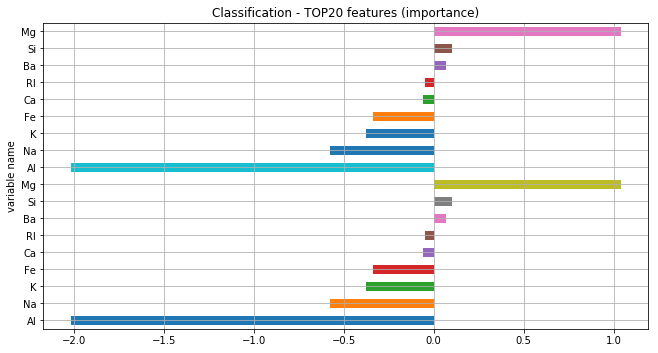

In [18]:
values = model.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

In [19]:
importance

,value
name,
Al,-2.016014
Na,-0.576480
K,-0.377706
Fe,-0.336485
Ca,-0.061560
RI,-0.045751
Ba,0.068445
Si,0.099744
Mg,1.037503
